media :dif         28.5763
count_ci     0.0000
count_c      2.7916
dtype: float64
varianza :dif         1458.803259
count_ci       0.000000
count_c        2.845254
dtype: float64


array([[<AxesSubplot:title={'center':'dif'}>,
        <AxesSubplot:title={'center':'count_ci'}>],
       [<AxesSubplot:title={'center':'count_c'}>, <AxesSubplot:>]],
      dtype=object)

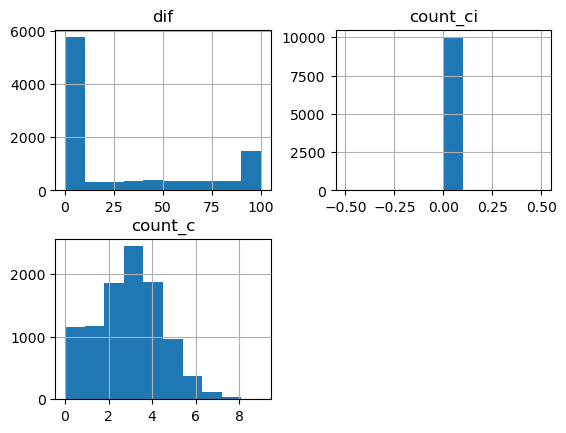

In [77]:
#Generación primera prueba con uniformes

import pandas as pd
import random
import numpy as np


n_repeat=10000
hist_n=24

dif_list=[]
c_ci_li=[]
c_c_li=[]
for j in range(n_repeat):
    correction=0
    salidas_new=[]
    corr_sal=[]
    entradas=np.random.randint(1, 100, size=hist_n)
    salidas=np.random.randint(1, 100, size=hist_n)
    init=100
    sin_init=0
  
    count_ci=0
    count_c=0
     #corrección de los valores aleatorios 
    for r in range(hist_n):
        init=init+entradas[r]-salidas[r]
       
        if init<0:
            salidas_new.append(salidas[r]+init)
         
        else:
           
            salidas_new.append(salidas[r])
           
    salidas=salidas_new        
    init=100
    for i in range(hist_n):
        
       
        init=init+entradas[i]-salidas[i]
      
        if init<0:
            init=0
            count_ci=count_ci+1
        else :
            pass
        sin_init=sin_init+entradas[i]-salidas[i]
        if sin_init<0:
            sin_init=0
            count_c=count_c+1
        else:
            pass
    c_ci_li.append(count_ci)
    c_c_li.append(count_c)    
      
    dif_list.append(init-sin_init)
   
z=pd.DataFrame({"dif":dif_list,"count_ci":c_ci_li,"count_c":c_c_li})
print("media :"+str(z.mean()))
print("varianza :"+str(z.var()))
z.hist()   

In [85]:
tot=z.shape[0]
z1=z[z["dif"]<5].shape[0]/tot
z2=z[z["dif"]<50].shape[0]/tot-z1
z1,z2,1-z1-z2

(0.5577, 0.15439999999999998, 0.28790000000000004)

In [94]:
(65/22)+(215/22)

12.727272727272728

media :dif         34.5554
count_ci     0.0000
count_c      3.8094
sum_neg     29.3180
dtype: float64
varianza :dif         1441.194250
count_ci       0.000000
count_c        5.495221
sum_neg      277.557432
dtype: float64


array([[<AxesSubplot:title={'center':'dif'}>,
        <AxesSubplot:title={'center':'count_ci'}>],
       [<AxesSubplot:title={'center':'count_c'}>,
        <AxesSubplot:title={'center':'sum_neg'}>]], dtype=object)

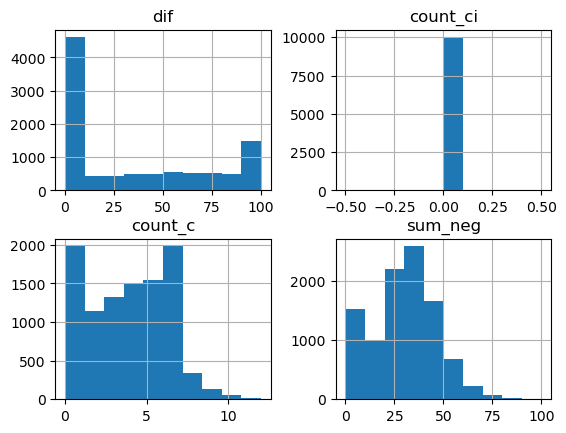

In [92]:
#Generación primera prueba con normales
import pandas as pd
import random
import numpy as np


n_repeat=10000
hist_n=32

dif_list=[]
c_ci_li=[]
c_c_li=[]
corr_fin=[]
for j in range(n_repeat):
    correction=0
    salidas_new=[]
    corr_sal=[]
    x=np.random.normal(80, 18, hist_n).astype(int)
    
    entradas=np.where(x<0,0,x)
    x=np.random.normal(80, 18, hist_n).astype(int)
    salidas=np.where(x<0,0,x)
    init=100
    sin_init=0
   
    count_ci=0
    count_c=0
    
    for r in range(hist_n):
        init=init+entradas[r]-salidas[r]
        
        if init<0:
            salidas_new.append(salidas[r]+init)
            
        else:
           
            salidas_new.append(salidas[r])
   
          
    salidas=salidas_new        
    init=100
    for i in range(hist_n):
        
      
        init=init+entradas[i]-salidas[i]
    
        if init<0:
            init=0
            count_ci=count_ci+1
        else :
            pass
        sin_init=sin_init+entradas[i]-salidas[i]
        if sin_init<0:
            corr_sal.append(-sin_init)
            sin_init=0
            count_c=count_c+1
        else:
            corr_sal.append(0)
            pass
    corr_fin.append(np.max(np.array(corr_sal)))
    c_ci_li.append(count_ci)
    c_c_li.append(count_c)    
    
    dif_list.append(init-sin_init)
   
z=pd.DataFrame({"dif":dif_list,"count_ci":c_ci_li,"count_c":c_c_li,"sum_neg":corr_fin})
print("media :"+str(z.mean()))
print("varianza :"+str(z.var()))
z.hist()   

In [93]:
tot=z.shape[0]
z1=z[z["dif"]<10].shape[0]/tot
z2=z[z["dif"]<50].shape[0]/tot-z1
z1,z2,1-z1-z2

(0.4605, 0.18509999999999993, 0.35440000000000005)

array([[<AxesSubplot:title={'center':'dif'}>,
        <AxesSubplot:title={'center':'count_ci'}>],
       [<AxesSubplot:title={'center':'count_c'}>,
        <AxesSubplot:title={'center':'sum_neg'}>]], dtype=object)

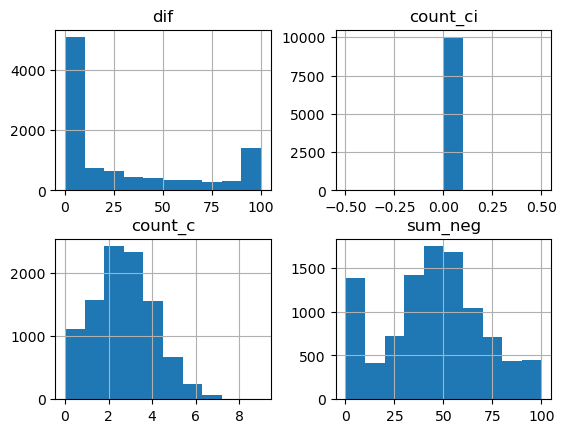

In [90]:
#Generación primera prueba con normales que se van adaptando a los inventarios del tiempo previo
import pandas as pd
import random
import numpy as np


n_repeat=10000
hist_n=24


dif_list=[]
c_ci_li=[]
c_c_li=[]
corr_fin=[]
for j in range(n_repeat):
    correction=0
    salidas_new=[]
    corr_sal=[]
   
    entradas=[]
    salidas=[0]*hist_n
   
    init=100
    sin_init=0
    
    count_ci=0
    count_c=0
    
    for r in range(hist_n):
        print()
        ent_p=np.random.normal(init, 33, 1).astype(int)#[0]
        ent_p=np.where(ent_p<0,100,ent_p)[0]
        sal_p=np.random.normal(init, 33, 1).astype(int)#[0]
        sal_p=np.where(sal_p<0,0,sal_p)[0]
        entradas.append(ent_p)
        init=init+ent_p-sal_p
       
        if init<0:
            salidas_new.append(salidas[r]+sal_p+init)
            
        else:
           
            salidas_new.append(salidas[r]+sal_p)
            
    salidas=salidas_new  
    entradas=np.array(entradas)      
  
    init=100
    for i in range(hist_n):
        
   
        init=init+entradas[i]-salidas[i]
     
        if init<0:
            init=0
            count_ci=count_ci+1
        else :
            pass
        sin_init=sin_init+entradas[i]-salidas[i]
        if sin_init<0:
            corr_sal.append(-sin_init)
            sin_init=0
            count_c=count_c+1
        else:
            corr_sal.append(0)
            pass
    corr_fin.append(np.max(np.array(corr_sal)))
    c_ci_li.append(count_ci)
    c_c_li.append(count_c)    
     
    dif_list.append(init-sin_init)

z=pd.DataFrame({"dif":dif_list,"count_ci":c_ci_li,"count_c":c_c_li,"sum_neg":corr_fin})
print("media :"+str(z.mean()))
print("varianza :"+str(z.var()))
z.hist()   

In [91]:
tot=z.shape[0]
z1=z[z["dif"]<10].shape[0]/tot
z2=z[z["dif"]<50].shape[0]/tot-z1
z1,z2,1-z1-z2
# np.random.normal(80, 18, hist_n).astype(int)[0]

(0.5079, 0.2257, 0.26639999999999997)